In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


In [4]:
#loading the csv data to a pandas dataframe
gold_data = pd.read_csv('C:\\Users\\Dell\\Downloads\\archive (43)\\gld_price_data.csv')

In [5]:
#print first 5 rows of the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [6]:
#prunt last 5 rows of the dataframe 
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [8]:
#number of rows and column
gold_data.shape


(2290, 6)

In [9]:
#gettting some basic information of the dataset
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [10]:
#checking no. of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [11]:
#getting statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


C:\Users\Dell\AppData\Local\Temp\ipykernel_9136\1869377257.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_data.corr()


<Axes: >

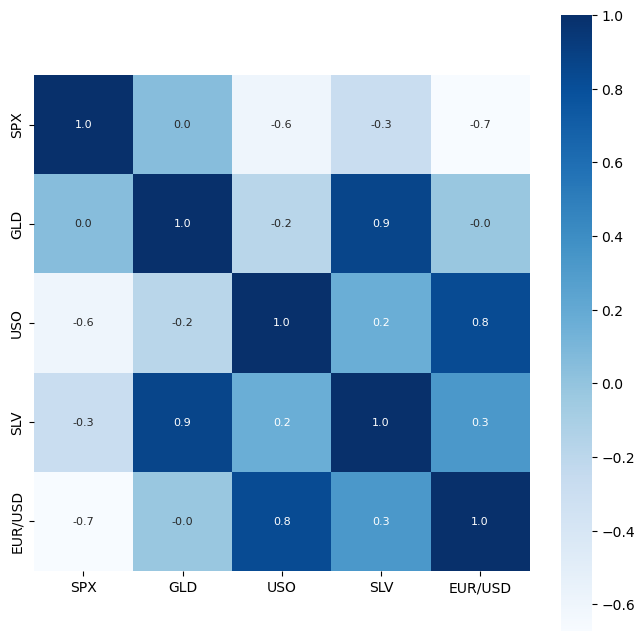

In [15]:
correlation = gold_data.corr()
#constructing a heatmap to understand correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [16]:
#correlation values of GOLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\Dell\AppData\Local\Temp\ipykernel_9136\609954237.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

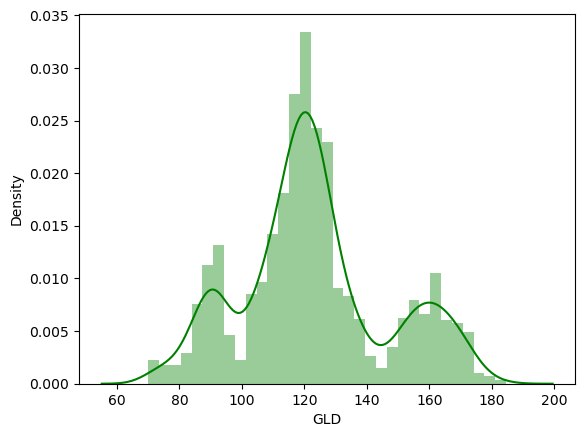

In [17]:
#checking distribution of the Gold prices
sns.distplot(gold_data['GLD'],color='green')

In [19]:
#splitting the features and target

In [20]:
X=gold_data.drop(["Date","GLD"],axis=1)
Y=gold_data["GLD"]

In [21]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [22]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [ ]:
#Splitting into train data and test data


In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [ ]:
#Model Training:Random Forest Regressor

In [34]:
regressor = RandomForestRegressor(n_estimators=100)

In [35]:
#training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [36]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [37]:
print(test_data_prediction)

[168.63179919  81.87189994 116.22500024 127.79180028 120.67550115
 154.75489761 150.46549851 126.22020029 117.50839872 125.84800103
 116.52680104 172.09780043 141.73949817 167.8173982  115.11630022
 117.74620034 139.02450348 170.21510051 159.53460204 158.1806994
 155.06939952 125.31140046 176.64509987 157.10400332 125.14800053
  93.94379964  77.76240019 120.22869991 119.10909966 167.56309995
  88.14890032 125.33740015  91.06230053 117.56590057 121.17669898
 136.80980156 115.57510127 114.93960074 147.90130057 106.95640135
 104.27250258  87.23139781 126.49600076 118.13650011 152.42409918
 119.73630021 108.29260015 108.15219829  93.34030065 127.0264984
  74.41350059 113.57759945 121.15779991 111.36909911 118.90429895
 120.74739969 157.91230159 167.15820083 146.915697    85.93769872
  94.26340013  86.87569875  90.57600014 119.00910086 126.46840078
 127.69249957 170.72730018 122.24149933 117.47679876  98.69430005
 168.25060106 143.24619847 132.23090304 121.1752022  120.96769957
 119.7486004

In [38]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9889670713341813


In [39]:
#Compare the Actual Values and Predicted Values in a Plot


In [40]:
Y_test = list(Y_test)

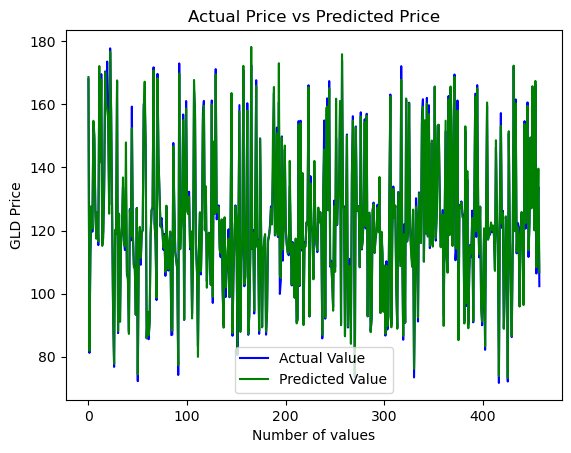

In [42]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()